In [2]:
import matplotlib.pyplot as plt
import cv2



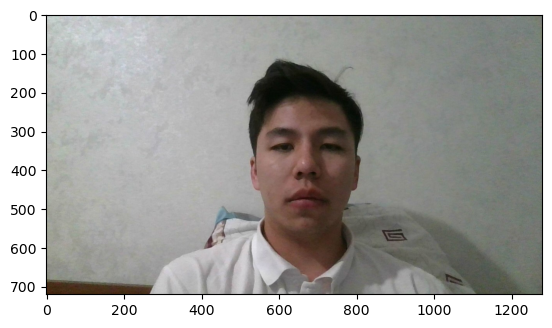

In [3]:
from skimage import io

img = io.imread('фото/train/Ernar/15.jpg')
plt.imshow(img)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

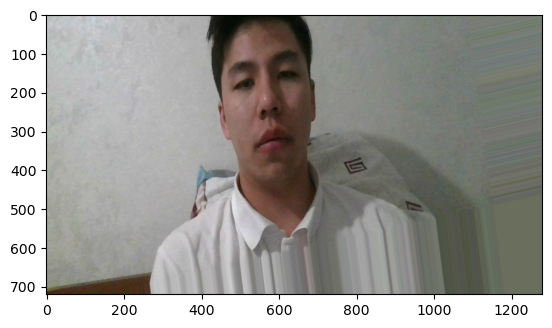

In [5]:
plt.imshow(image_gen.random_transform(img))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Создаем объект ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=20, # Диапазон случайных поворотов
        width_shift_range=0.2, # Диапазон случайных горизонтальных сдвигов
        height_shift_range=0.2, # Диапазон случайных вертикальных сдвигов
        shear_range=0.2, # Диапазон случайных сдвигов вдоль оси
        zoom_range=0.2, # Диапазон случайных масштабирований
        horizontal_flip=True, # Случайное отображение по горизонтали
        fill_mode='nearest') # Способ заполнения пропусков при изменении размера изображения

# Генерируем новые изображения на основе имеющихся
new_images = []
for image in images:
    image = image.reshape((1,) + image.shape)
    i = 0
    for batch in datagen.flow(image, batch_size=1):
        new_images.append(batch.reshape(batch.shape[1:]))
        i += 1
        if i >= 5: # Генерируем 5 новых изображений на основе каждого имеющегося
            break


In [8]:
image_gen.flow_from_directory('фото/train/')

Found 225 images belonging to 5 classes.


In [9]:
image_gen.flow_from_directory('фото/test/')

Found 25 images belonging to 5 classes.


In [10]:
image_shape = (150,150,3)

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= image_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= image_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

C:\Users\Nitro5\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 36)      5328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 68, 68, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 62424)             0         
                                                                 
 dense (Dense)               (None, 2024)              1

In [ ]:
# # load dataset
# # data = np.load('ORL_faces.npz') 

# # load the "Train Images"
# x_train = data['trainX']
# #normalize every image
# x_train = np.array(x_train,dtype='float32')/255

# x_test = data['testX']
# x_test = np.array(x_test,dtype='float32')/255

# # load the Label of Images
# y_train= data['trainY']
# y_test= data['testY']

# # show the train and test Data format
# print('x_train : {}'.format(x_train[:]))
# print('Y-train shape: {}'.format(y_train))
# print('x_test shape: {}'.format(x_test.shape))

In [101]:
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Flatten())


# model.add(Dense(128))
# model.add(Activation('relu'))

# # Dropouts help reduce overfitting by randomly turning neurons off during training.
# # Here we say randomly turn off 50% of neurons.
# model.add(Dropout(0.5))

# # Last layer, remember its binary, 0=cat , 1=dog
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [1]:
# model.summary()

In [13]:
image_shape[:2]

(150, 150)

In [14]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('фото/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 225 images belonging to 5 classes.


In [15]:
test_image_gen = image_gen.flow_from_directory('фото/test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 25 images belonging to 5 classes.


In [16]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Ernar': 4}

In [17]:
test_image_gen.class_indices


{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Ernar': 4}

In [173]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
results = cnn_model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=14,
                              validation_data=test_image_gen,
                             validation_steps=12)

C:\Users\Nitro5\AppData\Local\Temp\ipykernel_13692\4144636190.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = cnn_model.fit_generator(train_image_gen,epochs=100,


Epoch 1/100
14/14 [==============================] - 16s 1s/step - loss: 1.9906 - accuracy: 0.2105
Epoch 2/100
14/14 [==============================] - 16s 1s/step - loss: 1.9436 - accuracy: 0.2153
Epoch 3/100
14/14 [==============================] - 15s 1s/step - loss: 2.0206 - accuracy: 0.1722
Epoch 4/100
14/14 [==============================] - 16s 1s/step - loss: 1.9024 - accuracy: 0.1914
Epoch 5/100
14/14 [==============================] - 16s 1s/step - loss: 1.7356 - accuracy: 0.3014
Epoch 6/100
14/14 [==============================] - 22s 2s/step - loss: 1.8177 - accuracy: 0.2589
Epoch 7/100
 7/14 [==============>...............] - ETA: 8s - loss: 1.7348 - accuracy: 0.2589

KeyboardInterrupt: 

In [18]:
# results = model.fit_generator(train_image_gen,epochs=100,
#                               steps_per_epoch=150,
#                               validation_data=test_image_gen,
#                              validation_steps=12)

Epoch 1/100
150/150 [==============================] - 22s 121ms/step - loss: -48.2312 - accuracy: 0.2063 - val_loss: -264.7515 - val_accuracy: 0.2000


In [126]:
results.history['accuracy']

[0.9569377899169922,
 0.9617224931716919,
 0.9282296895980835,
 0.9617224931716919,
 0.9473684430122375,
 0.9617224931716919,
 0.9521530866622925,
 0.9569377899169922,
 0.9617224931716919,
 0.980861246585846,
 0.9569377899169922,
 0.9617224931716919,
 0.9665071964263916,
 0.980861246585846,
 0.980861246585846,
 0.9642857313156128,
 0.9760765433311462,
 0.9760765433311462,
 0.9553571343421936,
 0.9521530866622925,
 0.9521530866622925,
 0.9598214030265808,
 0.9377990365028381,
 0.9090909361839294,
 0.9569377899169922,
 0.9569377899169922,
 0.9569377899169922,
 0.9665071964263916,
 0.9569377899169922,
 0.9712918400764465,
 0.9712918400764465,
 0.9617224931716919,
 0.9521530866622925,
 0.9569377899169922,
 0.9473684430122375,
 0.9665071964263916,
 0.9569377899169922,
 0.9569377899169922,
 0.9521530866622925,
 0.9521530866622925,
 0.9760765433311462,
 0.9665071964263916,
 0.9904305934906006,
 0.9712918400764465,
 0.980861246585846,
 0.9712918400764465,
 0.980861246585846,
 0.961722493171691

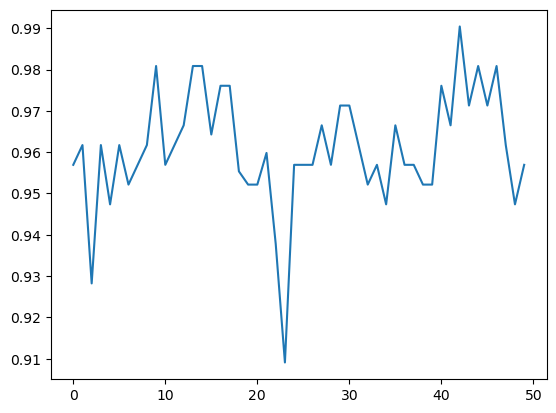

In [115]:
plt.plot(results.history['accuracy'])

In [116]:
# model.save('recog2.h5')

In [32]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

dog_file = 'testing/photo_2023-04-05_21-57-32.jpg'
dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [33]:
from keras.models import load_model

# Загрузка модели
model = load_model('recog2.h5')

prediction_prob = model.predict(dog_img)
predict_x=model.predict(dog_img) 
ynew=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 29ms/step


In [34]:
# Output prediction
print(f'Probability that image is a dog is: {ynew} ')

Probability that image is a dog is: [0] 


In [35]:

prediction_prob = model.predict(dog_img)
predict_x=model.predict(dog_img) 
ynew=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 30ms/step


In [38]:
# Output prediction
print(f'Probability that image is a dog is: {ynew} ')

Probability that image is a dog is: [0] 


In [40]:
ynew

array([0], dtype=int64)

In [39]:
prediction_prob

array([[0.45925376]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score

predicted =np.array(cnn_model.predict(test_image_gen))
#print(predicted)
#print(y_test)
# ynew = cnn_model.predict_classes(test_image_gen)
predict_x=cnn_model.predict(test_image_gen) 
ynew=np.argmax(predict_x,axis=1)


Acc=accuracy_score(test_image_gen.class_indices, ynew)
print("accuracy : ")
print(Acc)

2/2 [==============================] - 1s 350ms/step


ValueError: Found input variables with inconsistent numbers of samples: [5, 25]

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Загрузка модели
model = load_model('recog2.h5')

# Задание классов людей
class_dict = {
    4: 'Akhmedov Sanzhar',
    1: 'Alikhan Zhamankhan',
    2: 'Baibatchayeva Anar',
    3: 'Dalabay Abylay',
    0: 'Ernar'
}

# Запуск видеопотока с веб-камеры
cap = cv2.VideoCapture(0)

while True:
    # Получение кадра из видеопотока
    ret, frame = cap.read()

    # Преобразование изображения в чёрно-белое и изменение размера до 150x150
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        # Выделение лица
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=-1)
        face = face / 255.0

        # Распознавание лица
        # prediction = model.predict(face)
        # prediction_class = np.argmax(prediction)
        # print(prediction_class)
        # prediction_value = prediction[prediction_class] * 100
        # name = class_dict[prediction_class]
        
        
        prediction = model.predict(face)
        prediction_class = np.argmax(prediction, axis=-1)
        prediction_value = prediction[0][prediction_class[0]] * 100
        name = class_dict[prediction_class[0]]

        
        
        

        # Отображение процента сходства лица и соответствующего имени
        label = f"{prediction_value:.2f}% match, {name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        # Рисование прямоугольника вокруг лица
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Отображение кадра в окне
    cv2.imshow('frame', frame)
    
    # Выход из цикла при нажатии на клавишу 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождение ресурсов
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 28ms/step


In [21]:
import cv2
import numpy as np
import tensorflow as tf

# Загрузка модели
model = tf.keras.models.load_model('recog2.h5')

class_dict = {'Akhmedov Sanzhar': 4,
              'Alikhan Zhamankhan': 1,
              'Baibatchayeva Anar': 2,
              'Dalabay Abylay': 3,
              'Ernar': 0}

# Инициализация веб-камеры
cap = cv2.VideoCapture(0)

while True:
    # Получение кадра с веб-камеры
    ret, frame = cap.read()

    # Обнаружение лиц на кадре
    face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Проход по каждому обнаруженному лицу
    for (x, y, w, h) in faces:
        # Извлечение лица из кадра
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))

        # Преобразование лица в массив и нормализация значений пикселей
        face = np.array(face, dtype="float32") / 255
        face = np.expand_dims(face, axis=0)

        # Предсказание метки лица
        prediction = model.predict(face)

        # Отображение процента сходства лица
        prediction_value = prediction * 100
        # label = f"{prediction_value:.2f}% match"
        # label = f"{prediction:.2f}% match"
        # cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)
        
        
        # Получение индекса наиболее вероятного класса
        max_index = np.argmax(prediction)

        # Получение имени человека, соответствующего наиболее вероятному классу
        name = list(class_dict.keys())[list(class_dict.values()).index(max_index)]

        # Отображение процента сходства лица и соответствующего имени
        # label = f"{prediction_value:.2f}% match, {name}"
        name = str(name)
        label = f"{float(prediction_value):.2f}% match, {name}"

        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        
        
        

        # Отображение прямоугольника на лице
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Отображение кадра на экране
    cv2.imshow("Face Recognition", frame)

    # Завершение работы при нажатии на клавишу 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождение ресурсов
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 30ms/step


In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('recog2.h5')

# Определение классов
class_labels = ['Ernar','Akhmedov Sanzhar', 'Alikhan Zhamankhan', 'Baibatchayeva Anar', 'Dalabay Abylay']

# Открытие веб-камеры
cap = cv2.VideoCapture(0)

while True:
    # Считывание кадра из веб-камеры
    ret, frame = cap.read()
    
    if not ret:
        print("Unable to capture video")
        break
    
    # Распознавание лица с помощью вашей модели
    # Вам может потребоваться изменить размер изображения в соответствии с требованиями вашей модели
    # В данном примере мы предполагаем, что модель работает с изображениями размером 224x224
    img = cv2.resize(frame, (150, 150))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    predictions = model.predict(img)
    max_index = np.argmax(predictions[0])
    label = class_labels[max_index]
    confidence = predictions[0][max_index]
    
    # Вывод результата на экран
    label_text = "{}: {:.2f}%".format(label, confidence * 100)
    cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Отображение кадра
    cv2.imshow('Video', frame)
    
    # Выход из цикла по нажатию клавиши 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Освобождение ресурсов
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 28ms/step
